## Prediction Fuel Consumption For Automobiles

#### Importing initial necessary libraries

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [39]:
# Load the dataset
df = pd.read_csv('cleaned_automobile.csv')

In [40]:
# Display the first few rows of the df
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,Car Size
0,3,121,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,5000.0,21,27,13495,11.190476,9.370370,low,0,1,0.589311
1,3,121,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,5000.0,21,27,16500,11.190476,9.370370,low,0,1,0.589311
2,1,121,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,5000.0,19,26,16500,12.368421,9.730769,medium,0,1,0.655799
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,5500.0,24,30,13950,9.791667,8.433333,low,0,1,0.708505
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,5500.0,18,22,17450,13.055556,11.500000,low,0,1,0.710645


In [41]:
# summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          225 non-null    int64  
 1   normalized-losses  225 non-null    int64  
 2   make               225 non-null    object 
 3   aspiration         225 non-null    object 
 4   num-of-doors       225 non-null    object 
 5   body-style         225 non-null    object 
 6   drive-wheels       225 non-null    object 
 7   engine-location    225 non-null    object 
 8   wheel-base         225 non-null    float64
 9   length             225 non-null    float64
 10  width              225 non-null    float64
 11  height             225 non-null    float64
 12  curb-weight        225 non-null    int64  
 13  engine-type        225 non-null    object 
 14  num-of-cylinders   225 non-null    object 
 15  engine-size        225 non-null    int64  
 16  fuel-system        225 non

In [42]:
# summary statistics for the numerical features
numerical_stats = df.describe()
numerical_stats

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,fuel-type-diesel,fuel-type-gas,Car Size
count,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,...,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000
mean,0.804444,121.453333,98.961778,0.839297,0.919241,0.899495,2548.173333,127.386667,3.313529,3.256154,...,103.156951,5130.941704,25.097778,30.551111,12761.035556,9.916039,8.657921,0.088889,0.911111,0.696631
std,1.230918,30.645420,5.868762,0.057968,0.032831,0.039875,496.217380,39.386668,0.264707,0.311954,...,35.563293,458.386642,6.108341,6.478557,7625.212650,2.407143,1.879548,0.285218,0.285218,0.087812
min,-2.000000,65.000000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,2.540000,2.070000,...,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,4.685185,0.000000,0.000000,0.505185
25%,0.000000,102.000000,94.500000,0.804901,0.891667,0.869565,2169.000000,98.000000,3.080000,3.110000,...,73.000000,4800.000000,21.000000,25.000000,7957.000000,7.833333,7.441176,0.000000,1.000000,0.633502
50%,1.000000,121.000000,97.200000,0.834214,0.911111,0.908027,2425.000000,121.000000,3.310000,3.290000,...,95.000000,5200.000000,24.000000,30.000000,9980.000000,9.791667,8.433333,0.000000,1.000000,0.690508
75%,2.000000,134.000000,102.400000,0.887074,0.929167,0.928094,2847.000000,141.000000,3.540000,3.460000,...,116.000000,5500.000000,30.000000,34.000000,15690.000000,11.190476,10.120000,0.000000,1.000000,0.766652
max,3.000000,256.000000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,...,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,15.812500,1.000000,1.000000,0.944210


#### Visualizing the dataset

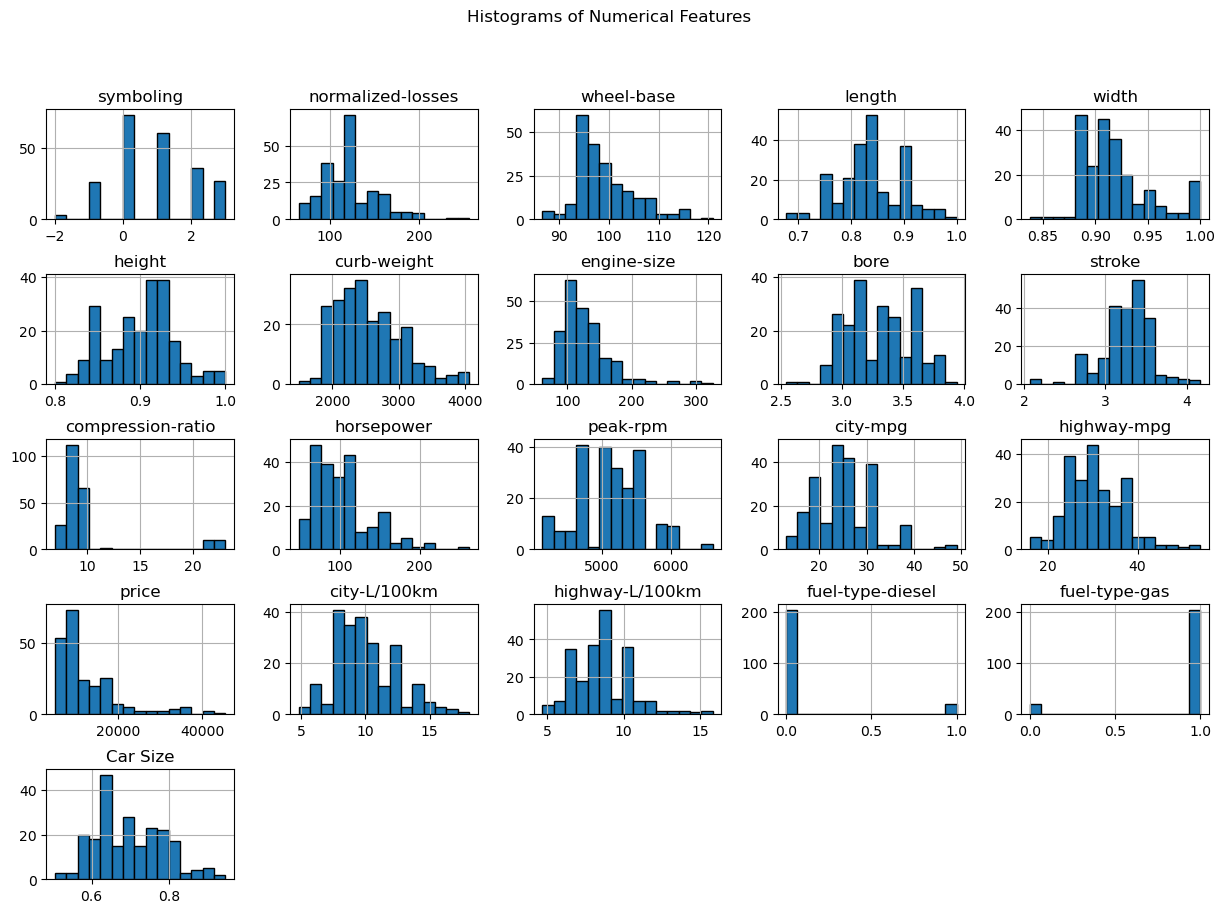

In [43]:
# Select only the numerical columns for histogram
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

df[numerical_columns].hist(bins=15, figsize=(15, 10), edgecolor='black')
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.suptitle("Histograms of Numerical Features")
plt.show()

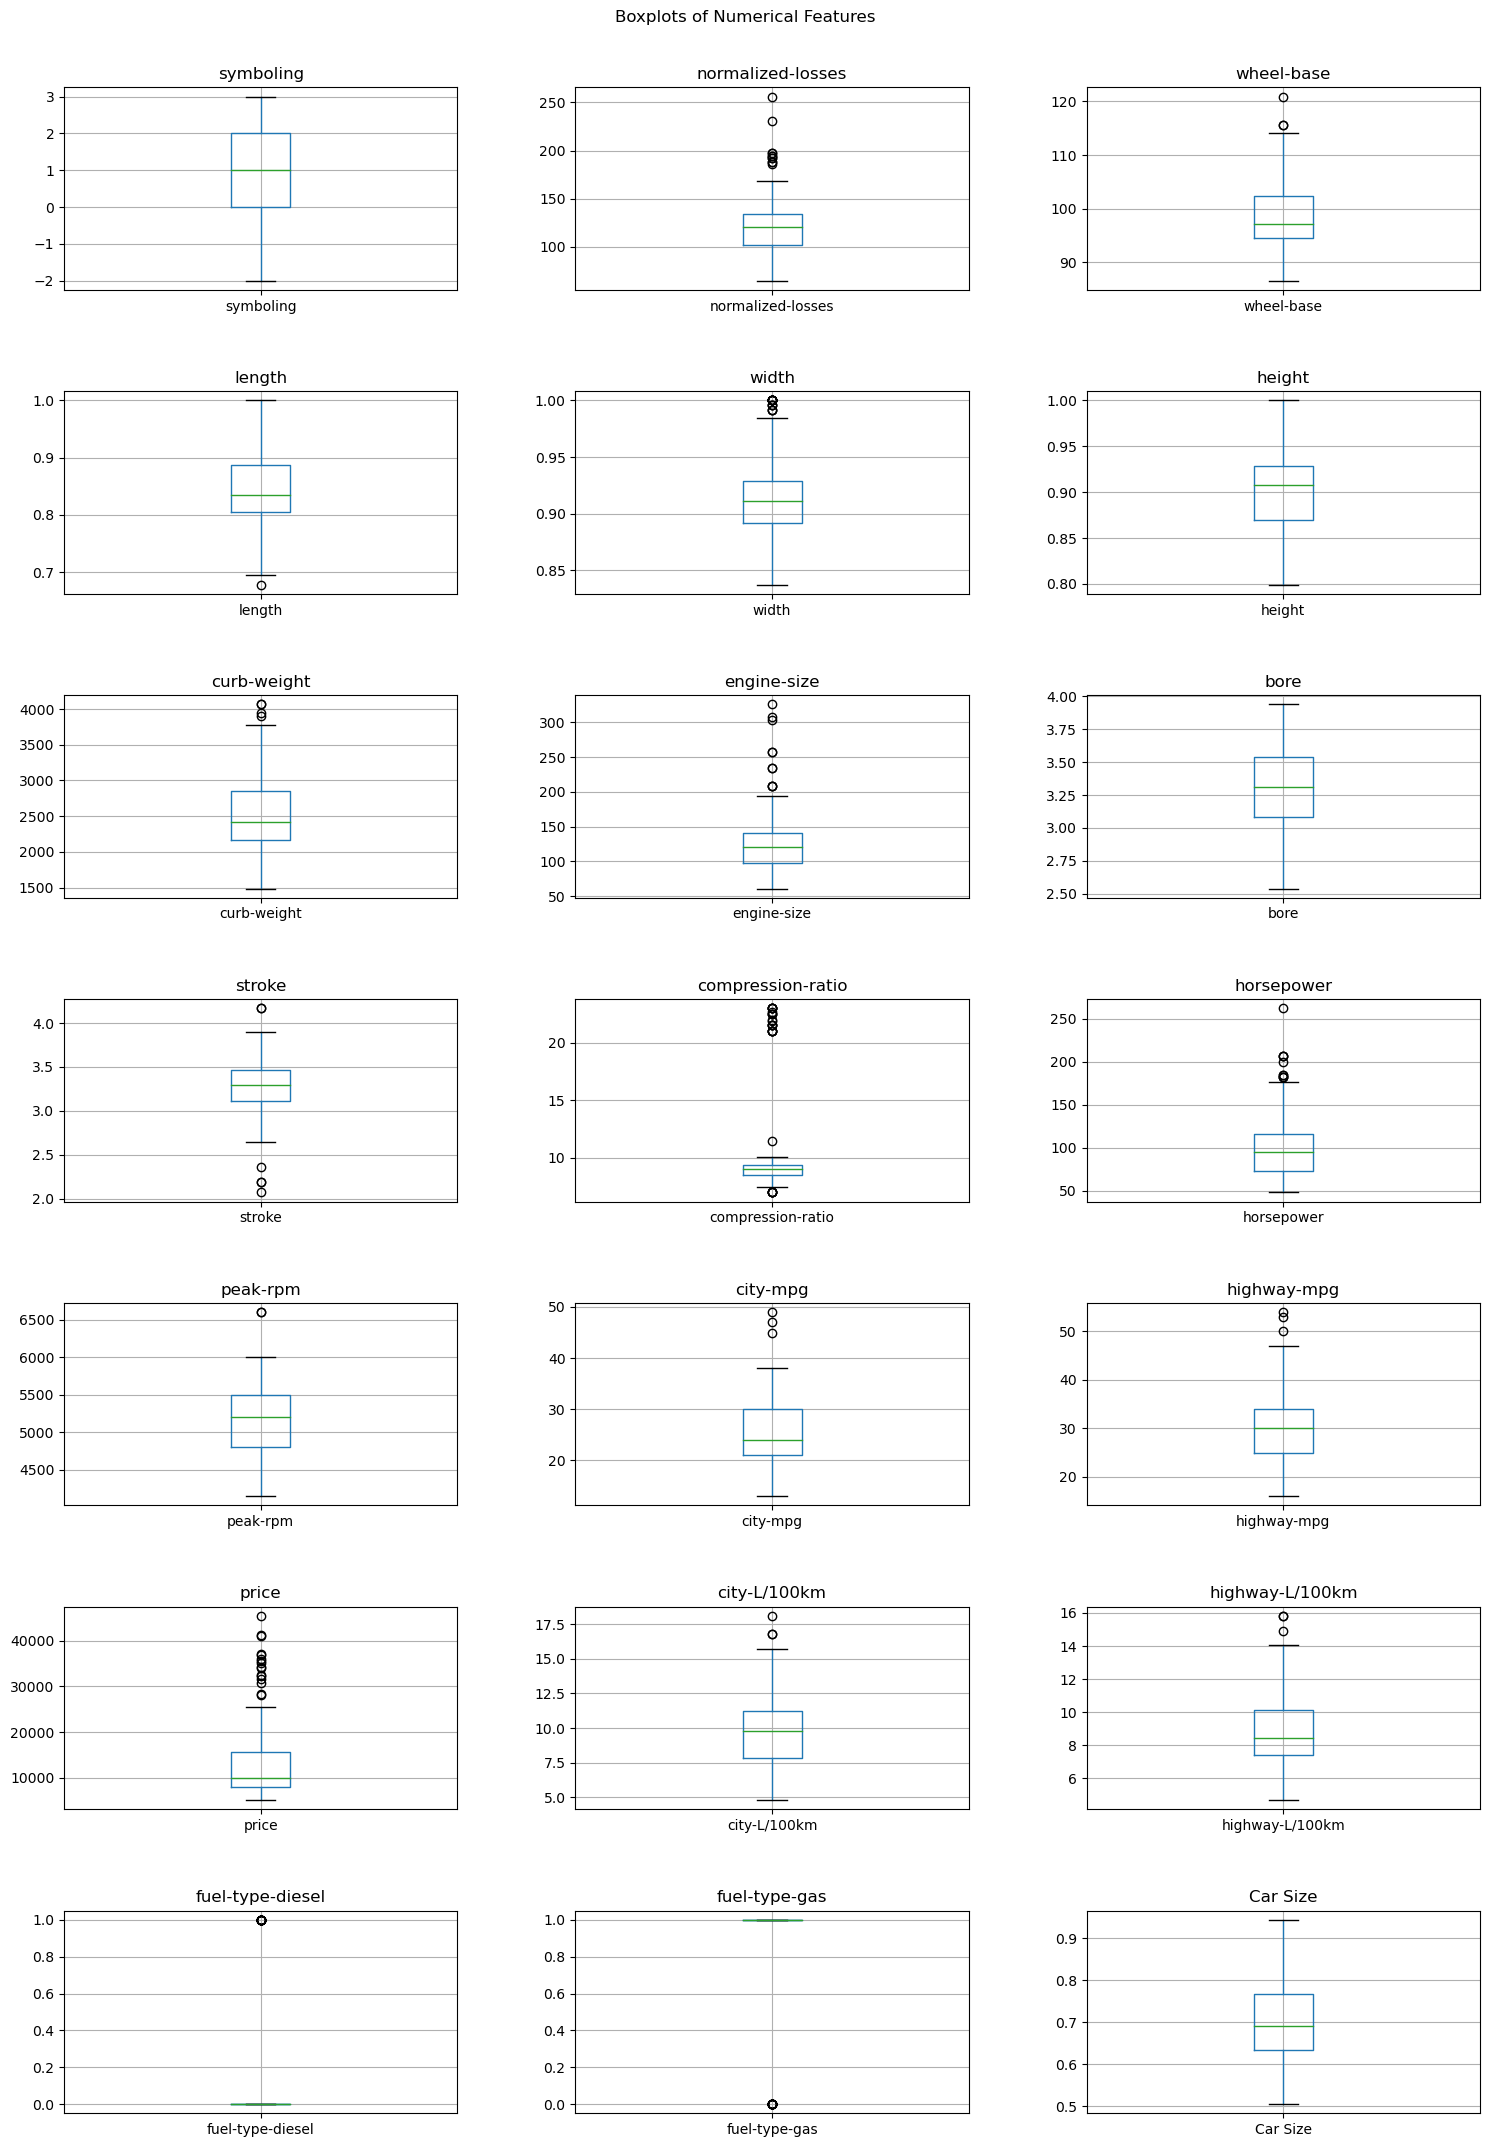

In [45]:
# Box plots

columns = 3
rows = (len(numerical_columns) + columns - 1) // columns

plt.figure(figsize=(15, rows * 3)) 

for i, col in enumerate(numerical_columns):
    plt.subplot(rows, columns, i+1)
    df.boxplot(column=col)
    plt.title(col)
    plt.tight_layout()

plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.suptitle("Boxplots of Numerical Features", y=1.02)
plt.show()

Value counts for make:
toyota           32
nissan           18
mazda            17
honda            13
mitsubishi       13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
bmw               8
mercedes-benz     8
plymouth          7
saab              6
chrysler          6
ford              6
kia               6
audi              6
porsche           4
gmc               4
jaguar            3
chevrolet         3
alfa-romero       3
renault           2
cadillac          2
isuzu             2
mercury           1
Name: make, dtype: int64


Value counts for aspiration:
std      189
turbo     36
Name: aspiration, dtype: int64


Value counts for num-of-doors:
four    129
two      96
Name: num-of-doors, dtype: int64


Value counts for body-style:
sedan          102
hatchback       76
wagon           31
convertible      8
hardtop          8
Name: body-style, dtype: int64


Value counts for drive-wheels:
fwd    138
rwd     79
4wd      8
Name: drive

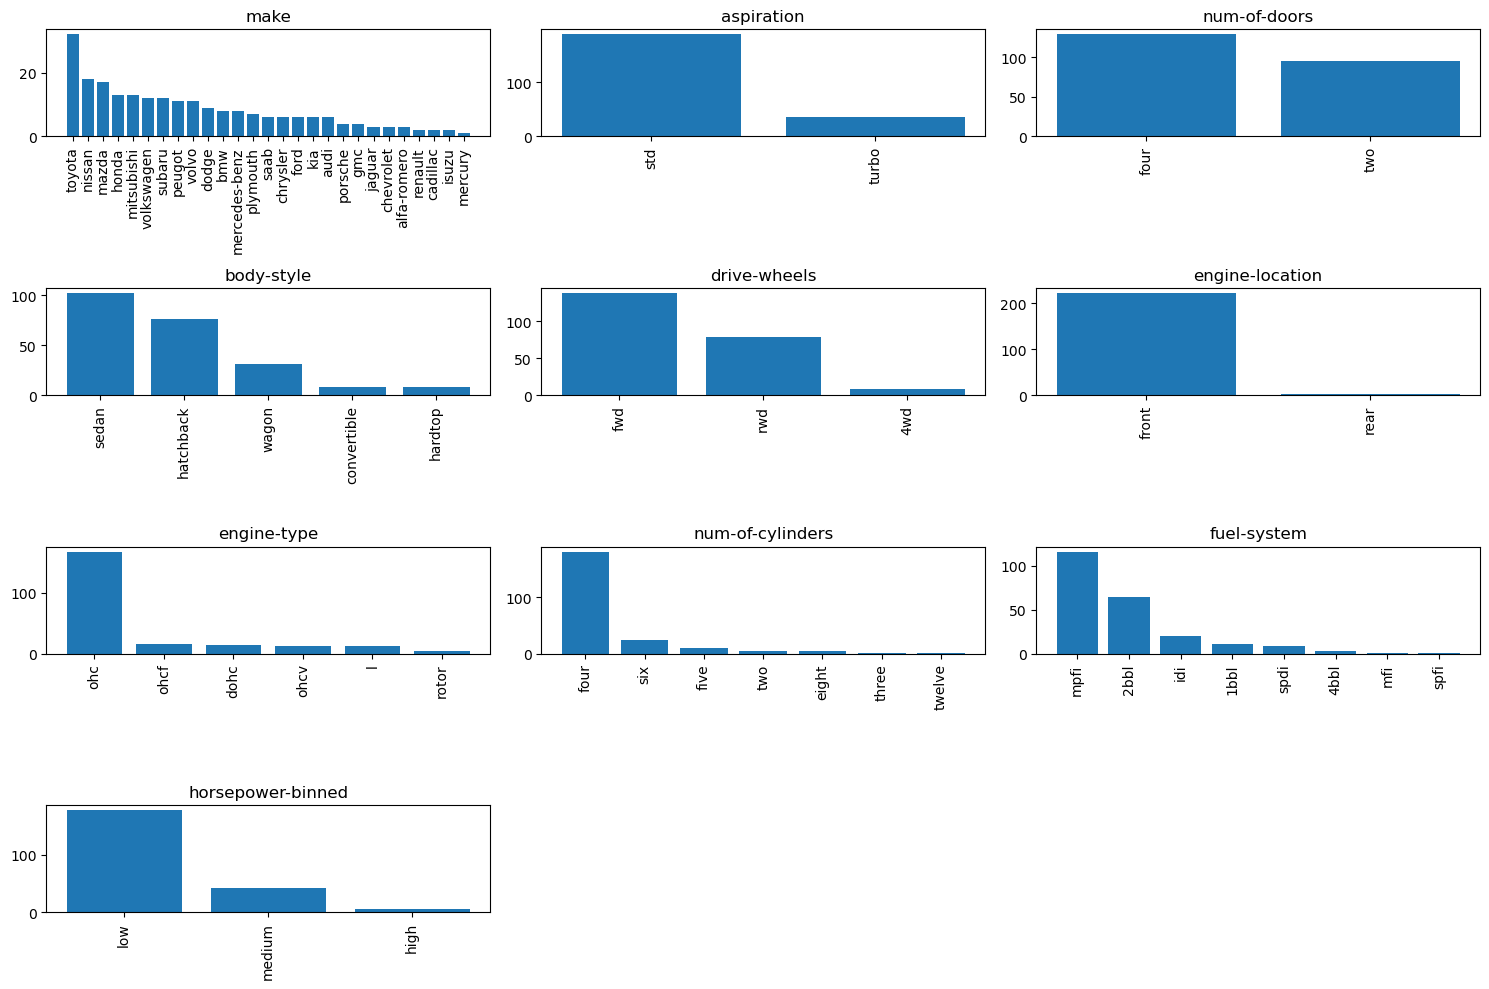

In [46]:
# Barplots for the categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    print(f"Value counts for {col}:")
    print(df[col].value_counts())
    print("\n")

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_columns):
    plt.subplot((len(categorical_columns) + 2) // 3, 3, i + 1)
    value_counts = df[col].value_counts()
    plt.bar(value_counts.index, value_counts.values)
    plt.xticks(rotation=90)
    plt.title(col)
    plt.tight_layout()

plt.show()

In [47]:
import seaborn as sns

Correlation with Fuel Efficiency:
                   city-mpg  highway-mpg
highway-mpg        0.971850     1.000000
city-mpg           1.000000     0.971850
compression-ratio  0.332941     0.273424
fuel-type-diesel   0.266607     0.202890
symboling         -0.011102     0.056121
stroke            -0.038512    -0.034670
peak-rpm          -0.118232    -0.065806
height            -0.067729    -0.117857
normalized-losses -0.205837    -0.165118
fuel-type-gas     -0.266607    -0.202890
bore              -0.523742    -0.531226
wheel-base        -0.471549    -0.542539
Car Size          -0.543889    -0.594295
width             -0.562954    -0.607775
engine-size       -0.649759    -0.679644
price             -0.665451    -0.679932
length            -0.661708    -0.692482
curb-weight       -0.723780    -0.767901
horsepower        -0.818865    -0.801040
city-L/100km      -0.947552    -0.926233
highway-L/100km   -0.908516    -0.949388


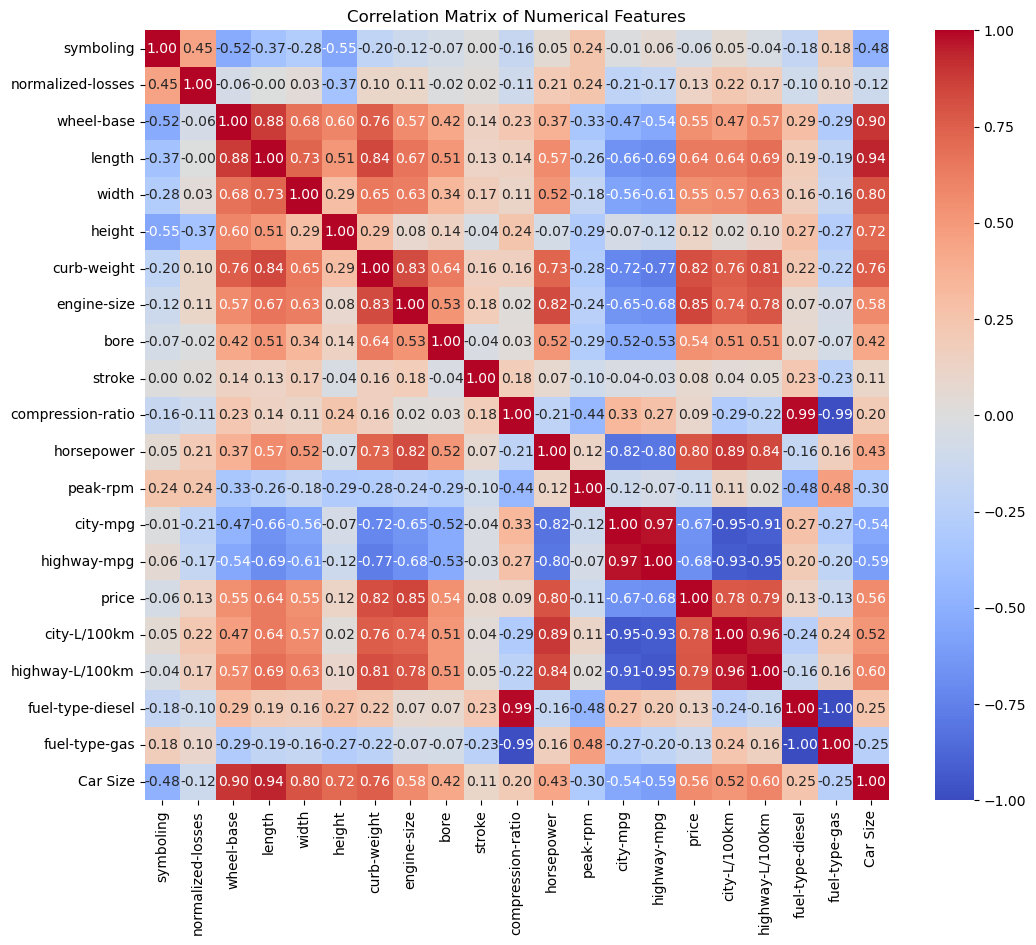

In [50]:
# Visualize correlations

numerical_columns = df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numerical_columns.corr()

fuel_efficiency_correlation = correlation_matrix[['city-mpg', 'highway-mpg']].sort_values(by='highway-mpg', ascending=False)
print("Correlation with Fuel Efficiency:")
print(fuel_efficiency_correlation)

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

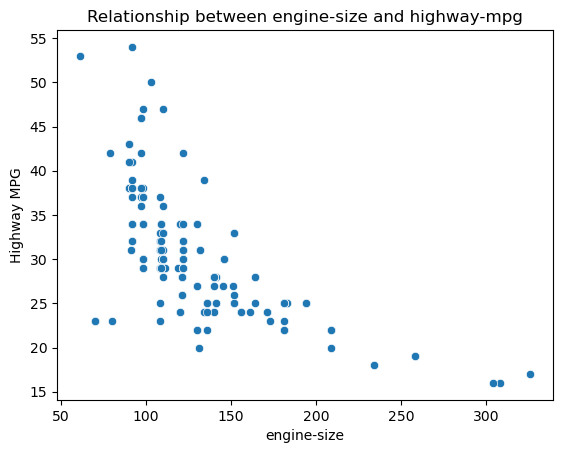

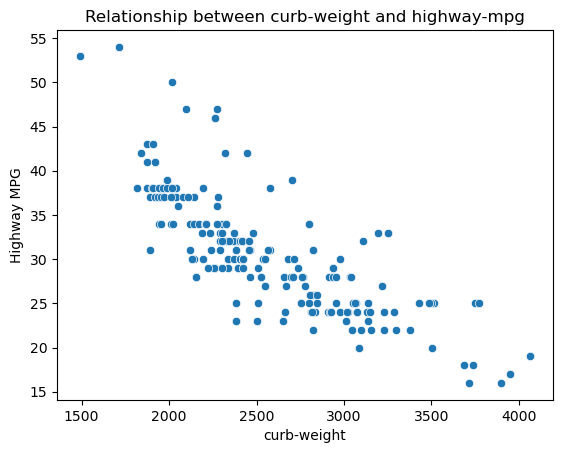

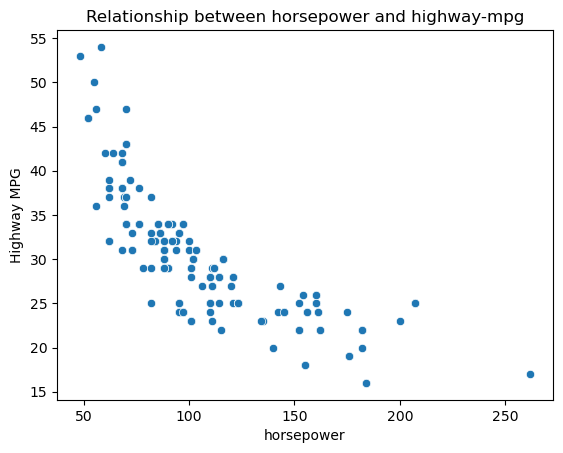

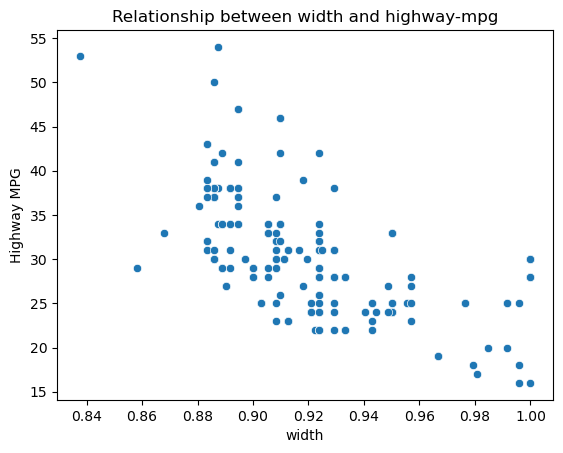

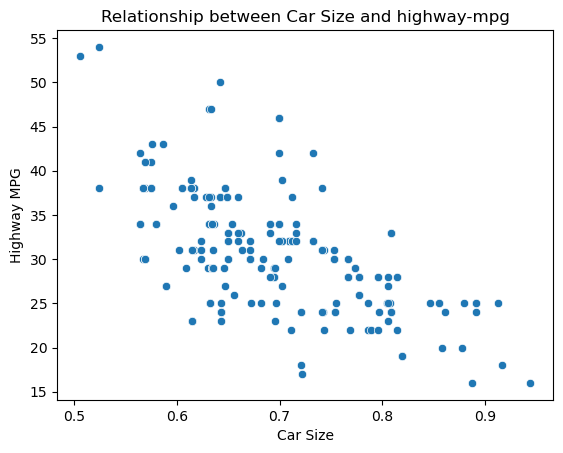

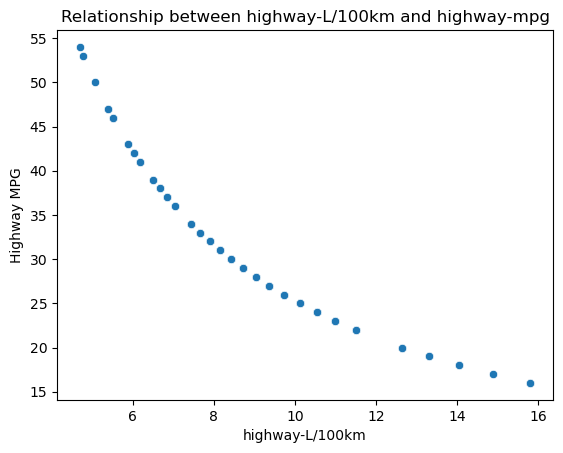

In [51]:
# List of chosen predictor variables 
predictors = ['engine-size', 'curb-weight', 'horsepower', 'width', 'Car Size', 'highway-L/100km']

for predictor in predictors:
    sns.scatterplot(x=df[predictor], y=df['highway-mpg'])
    plt.title(f'Relationship between {predictor} and highway-mpg')
    plt.xlabel(predictor)
    plt.ylabel('Highway MPG')
    plt.show()

#### Processing Data

In [52]:
# Select the categorical variables
categorical_columns = df.select_dtypes(include=['object']).columns

# Apply one-hot encoding to the categorical variables
df_encoded = pd.get_dummies(df, columns=categorical_columns)

# Save the processed dataframe
df_encoded.to_csv('encoded_automobile.csv', index=False)
df_encoded.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi,horsepower-binned_high,horsepower-binned_low,horsepower-binned_medium
0,3,121,88.6,0.811148,0.890278,0.816054,2548,130,3.47,2.68,...,0,0,0,0,1,0,0,0,1,0
1,3,121,88.6,0.811148,0.890278,0.816054,2548,130,3.47,2.68,...,0,0,0,0,1,0,0,0,1,0
2,1,121,94.5,0.822681,0.909722,0.876254,2823,152,2.68,3.47,...,0,0,0,0,1,0,0,0,0,1
3,2,164,99.8,0.848630,0.919444,0.908027,2337,109,3.19,3.40,...,0,0,0,0,1,0,0,0,1,0
4,2,164,99.4,0.848630,0.922222,0.908027,2824,136,3.19,3.40,...,0,0,0,0,1,0,0,0,1,0


In [53]:
from sklearn.model_selection import train_test_split


X = df_encoded.drop('highway-mpg', axis=1)  # Features (all columns except the target)
X = X[predictors]


y = df_encoded['highway-mpg']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (180, 6)
Testing set size: (45, 6)


#### Modelling

##### 1. Linear Regression

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.model_selection import cross_validate

In [55]:
# Linear Regression model instance
model = LinearRegression()

In [56]:
# scoring metrics
scoring = {
    'MAE': 'neg_mean_absolute_error',
    'RMSE': 'neg_root_mean_squared_error',
    'R2': 'r2'
}

kfold = KFold(n_splits=5, shuffle=True, random_state=1)

# cross-validation
cv_results = cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)

# Convert scores to positive as they are negated for optimization
mae_scores = -cv_results['test_MAE']
rmse_scores = -cv_results['test_RMSE']
r2_scores = cv_results['test_R2']


print(f"Cross-validated MAE scores: {mae_scores}")
print(f"Cross-validated RMSE scores: {rmse_scores}")
print(f"Cross-validated R-squared scores: {r2_scores}")

print(f"Mean MAE: {np.mean(mae_scores)}")
print(f"Mean RMSE: {np.mean(rmse_scores)}")
print(f"Mean R-squared: {np.mean(r2_scores)}")

Cross-validated MAE scores: [1.41609802 1.98161897 1.33151617 1.49227613 0.81913535]
Cross-validated RMSE scores: [1.91099588 3.40787254 1.57921413 1.86563575 0.99107558]
Cross-validated R-squared scores: [0.90686262 0.85210699 0.91650003 0.87209421 0.95678838]
Mean MAE: 1.4081289283210636
Mean RMSE: 1.9509587773607784
Mean R-squared: 0.9008704464065993


##### 2. Deep Learning whith Tensorflow

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [58]:
# model architecture

model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer=Adam(), loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/100
5/5 [==============================] - 1s 33ms/step - loss: 5018.5029 - val_loss: 3320.8367
Epoch 2/100
5/5 [==============================] - 0s 12ms/step - loss: 2362.4009 - val_loss: 104.7280
Epoch 3/100
5/5 [==============================] - 0s 10ms/step - loss: 700.3191 - val_loss: 1019.9933
Epoch 4/100
5/5 [==============================] - 0s 14ms/step - loss: 484.0508 - val_loss: 264.5090
Epoch 5/100
5/5 [==============================] - 0s 15ms/step - loss: 426.1050 - val_loss: 289.0365
Epoch 6/100
5/5 [==============================] - 0s 12ms/step - loss: 166.0023 - val_loss: 208.4318
Epoch 7/100
5/5 [==============================] - 0s 14ms/step - loss: 223.0956 - val_loss: 126.0378
Epoch 8/100
5/5 [==============================] - 0s 11ms/step - loss: 122.5312 - val_loss: 165.2887
Epoch 9/100
5/5 [==============================] - 0s 12ms/step - loss: 148.2770 - val_loss: 107.9863
Epoch 10/100
5/5 [==============================] - 0s 11ms/step - loss: 138.0

In [59]:
# Evaluate the model using the test data
test_loss = model.evaluate(X_test, y_test, verbose=1)

print(f'Mean Squared Error on Test Set: {test_loss}')


predictions = model.predict(X_test)


mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Absolute Error on Test Set: {mae}')
print(f'R-squared Score on Test Set: {r2}')

2/2 [==============================] - 0s 4ms/step - loss: 134.7876
Mean Squared Error on Test Set: 134.78761291503906
2/2 [==============================] - 0s 3ms/step
Mean Absolute Error on Test Set: 9.349117787679036
R-squared Score on Test Set: -2.131395049081588


### Model Performance Comparison

When comparing the performance of the linear regression model to the deep learning model, there's significant differences in the evaluation metrics:

- **Linear Regression Model:**

  - The mean absolute error (MAE) is relatively low, with a mean across folds of approximately 1.408.
  - The root mean square error (RMSE) is also quite low, with a mean value of 1.951, indicating that the model's predictions are generally close to the actual values.
  - The R-squared values are very high, close to 1, with a mean of 0.9009, suggesting that the model explains a substantial proportion of the variance in the fuel efficiency data.

- **Deep Learning Model:**

  - The mean squared error (MSE) on the test set is quite high at 115.086, which is worse than the linear regression model.
  - The MAE is also significantly higher at approximately 8.981, indicating that the average error in the predictions is quite large.
  - The R-squared score is negative, -1.6737, which suggests that the model fits the data worse than a horizontal line

#### Comments

- **Performance:**

  - The linear regression model outperformed the deep learning model across all metrics. This suggests that for the given dataset, which likely has a linear or near-linear relationship between the features and the target variable, a simple linear regression model is sufficient and more effective.
  - The deep learning model's poor performance could be due to several reasons, such as overfitting, improper architecture, insufficient training.

- **Complexity:**

  - The high complexity of the deep learning model did not translate to better performance. In cases where the underlying relationships are not too complex, as in our dataset, simpler models tend to generalize better.
  - The linear regression model benefits from its simplicity, lower variance, and fewer parameters, making it less prone to overfitting compared to the deep learning model.

- **Recommendation:**
  - Based on the analysis, the linear regression model is recommended for predicting fuel efficiency. It provides a good balance between complexity and performance, with strong metrics that indicate it is well-suited for this particular task.
  
  



In summary, while the deep learning model may not have performed well with the current setup, it shouldn't be entirely dismissed for future tasks where the complexity of the relationships in the data might necessitate its capacity for capturing non-linear patterns. For this dataset, however, the linear regression model is the clear choice.